In [96]:
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib as mpl

# To render plots inside the Jupyter notebook
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

In [7]:
import pandas as pd
import xml.etree.ElementTree as ET, urllib.request, gzip, io

In [172]:
def find_planets(detection_method):  
    """This function queries the Open Exoplanet Catalogue for planets
    and returns all detections as a Pandas DataFrame object."""  

    # Link to OEC
    url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"
    
    # Load XML tree into memory
    oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.request.urlopen(url).read())))
    
    # Store all planets
    columns = ['m', 'm_erru', 'm_errorl', 'R', 'a', 'P',
               'e', 'I', 'metallicity']
    rows = []

    # Find all transit planets
    for planet in oec.findall(".//planet"): # note, "//" searches through all sublevels
        if (planet.findtext("discoverymethod")==detection_method):
            rows.append(planet.findtext("name"))

    # Create DataFrame object
    planets = pd.DataFrame(columns=columns, index=rows)

    # Iterate over each planet, fill in the column data
    for planet in oec.findall(".//planet"):
        if (planet.findtext("discoverymethod")==detection_method):
            mass_errors = [0, 0]
            if planet.find("./mass") is not None:
                mass_errors[0] = planet.find("./mass").get('errorplus')
                mass_errors[1] = planet.find("./mass").get('errorminus')

            data = [
                    planet.findtext("mass"),
                    mass_errors[0],
                    mass_errors[1],
                    planet.findtext("radius"),
                    planet.findtext("semimajoraxis"),
                    planet.findtext("period"),
                    planet.findtext("eccentricity"),
                    planet.findtext("inclination"),
                    planet.findtext("metallicity"),
                ]

            planets.loc[planet.findtext("name")] = data       

    # Convert all values in DataFrame to floats
    planets = planets.apply(pd.to_numeric, errors='raise')
    
    return planets

In [173]:
planets_transit = find_planets('transit')
planets_rv = find_planets('RV')
planets_imaging = find_planets('imaging')
planets_timing = find_planets('timing')
planets_microlensing = find_planets('microlensing')

planets_all = pd.concat([planets_transit, planets_rv])

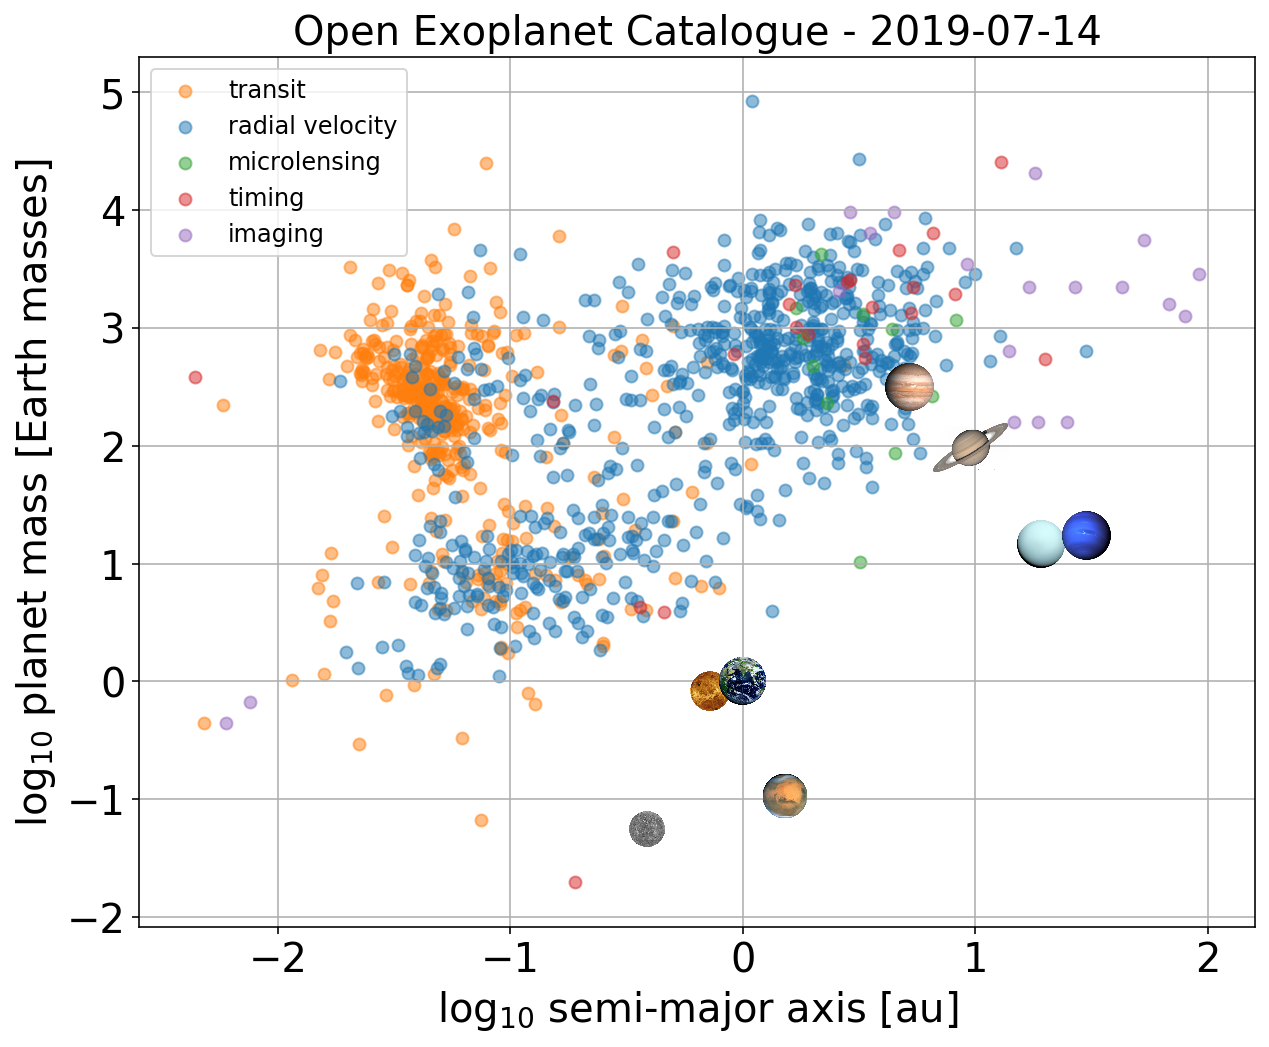

In [200]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(np.log10(planets_transit['a'].values), 
           np.log10(planets_transit['m'].values*317.828), label='transit', color='C1', alpha=0.5)
ax.scatter(np.log10(planets_rv['a'].values), 
           np.log10(planets_rv['m'].values*317.828), color='C0', label='radial velocity', alpha=0.5)
ax.scatter(np.log10(planets_microlensing['a'].values), 
           np.log10(planets_microlensing['m'].values*317.828), color='C2', label='microlensing', alpha=0.5)
ax.scatter(np.log10(planets_timing['a'].values), 
           np.log10(planets_timing['m'].values*317.828), color='C3', label='timing', alpha=0.5)
ax.scatter(np.log10(planets_imaging['a'].values), 
           np.log10(planets_imaging['m'].values*317.828), color='C4', label='imaging', alpha=0.5)

ax.set_xlabel('$\log_{10}$ semi-major axis [au]')
ax.set_ylabel('$\log_{10}$ planet mass [Earth masses]')
ax.grid()
ax.legend(prop={'size': 12})

from datetime import date
today = date.today()
ax.set_title(f'Open Exoplanet Catalogue - {today}')

# Add images of Solar System planets
# https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

imscatter(np.log10(0.38709893), np.log10(0.05527), 'images/mercury.png', zoom=0.08, ax=ax)
imscatter(np.log10(0.72333199), np.log10(0.815), 'images/venus.png', zoom=0.09, ax=ax)
imscatter(np.log10(1.), np.log10(1.), 'images/earth.png', zoom=0.07, ax=ax)
imscatter(np.log10(1.5236), np.log10(0.1074), 'images/mars.png', zoom=0.05, ax=ax)
imscatter(np.log10(5.2044), np.log10(317.8), 'images/jupiter.png', zoom=0.1, ax=ax)
imscatter(np.log10(9.53707), np.log10(95.16), 'images/saturn.png', zoom=0.12, ax=ax)
imscatter(np.log10(19.19126), np.log10(14.54), 'images/uranus.png', zoom=0.1, ax=ax)
imscatter(np.log10(30.0689), np.log10(17.15), 'images/neptune.png', zoom=0.1, ax=ax)

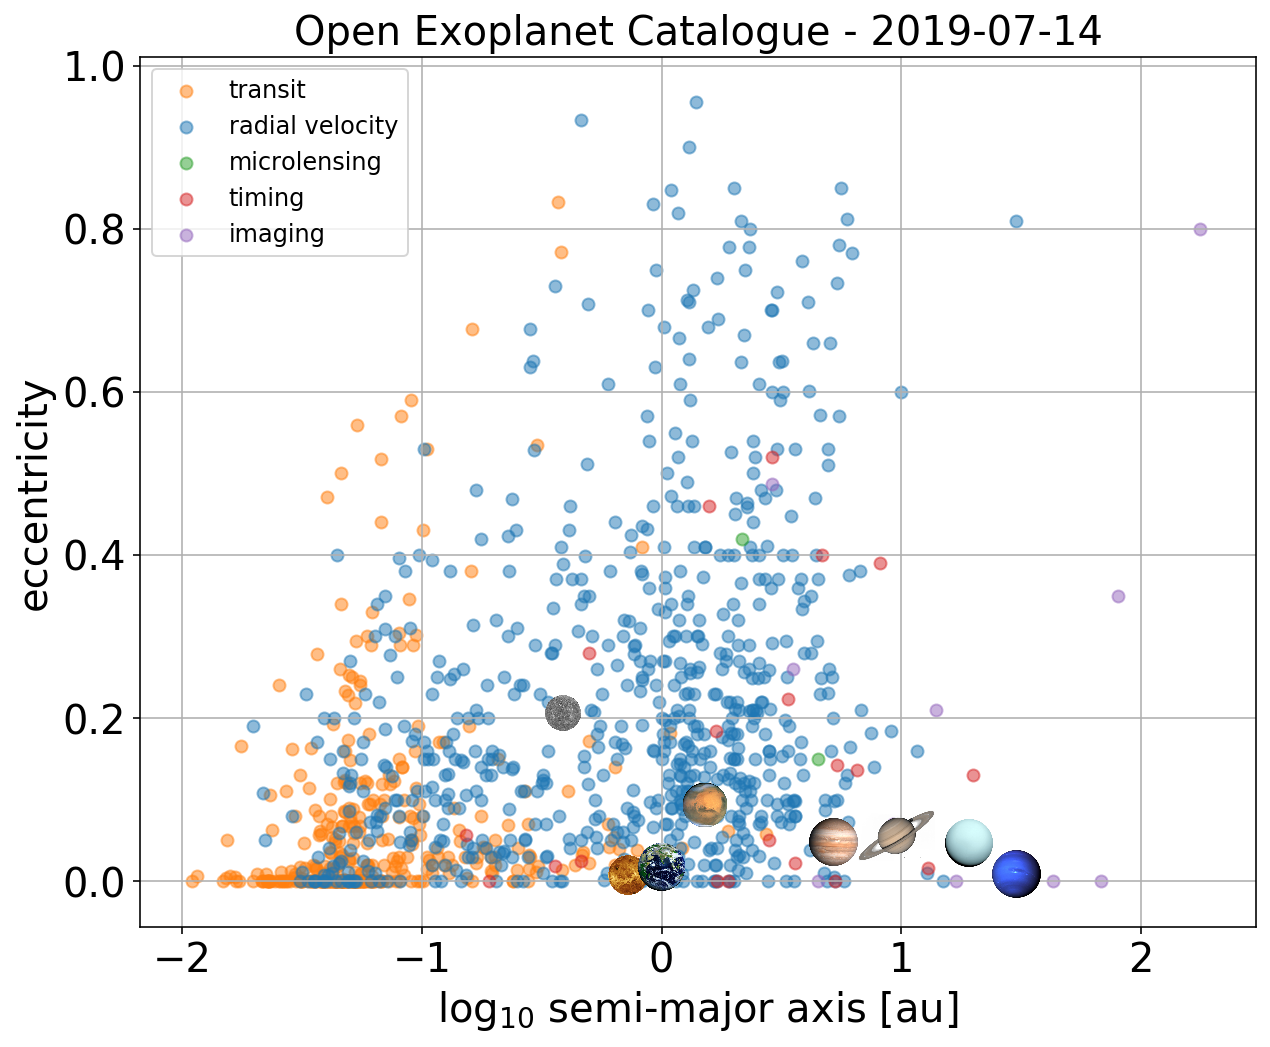

In [199]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(np.log10(planets_transit['a'].values), 
           planets_transit['e'].values, label='transit', color='C1', alpha=0.5)
ax.scatter(np.log10(planets_rv['a'].values), 
           planets_rv['e'].values, color='C0', label='radial velocity', alpha=0.5)
ax.scatter(np.log10(planets_microlensing['a'].values), 
           planets_microlensing['e'].values, color='C2', label='microlensing', alpha=0.5)
ax.scatter(np.log10(planets_timing['a'].values), 
           planets_timing['e'].values, color='C3', label='timing', alpha=0.5)
ax.scatter(np.log10(planets_imaging['a'].values), 
           planets_imaging['e'].values, color='C4', label='imaging', alpha=0.5)

ax.set_xlabel('$\log_{10}$ semi-major axis [au]')
ax.set_ylabel('eccentricity')
ax.grid()
ax.legend(prop={'size': 12})

from datetime import date
today = date.today()
ax.set_title(f'Open Exoplanet Catalogue - {today}')

# Add images of Solar System planets
imscatter(np.log10(0.38709893), 0.206, 'images/mercury.png', zoom=0.08, ax=ax)
imscatter(np.log10(0.72333199), 0.007, 'images/venus.png', zoom=0.09, ax=ax)
imscatter(np.log10(1.), 0.017, 'images/earth.png', zoom=0.07, ax=ax)
imscatter(np.log10(1.5236), 0.093, 'images/mars.png', zoom=0.05, ax=ax)
imscatter(np.log10(5.2044), 0.048, 'images/jupiter.png', zoom=0.1, ax=ax)
imscatter(np.log10(9.53707), 0.056, 'images/saturn.png', zoom=0.12, ax=ax)
imscatter(np.log10(19.19126), 0.047, 'images/uranus.png', zoom=0.1, ax=ax)
imscatter(np.log10(30.0689), 0.009, 'images/neptune.png', zoom=0.1, ax=ax)

/anaconda3/envs/pymc3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


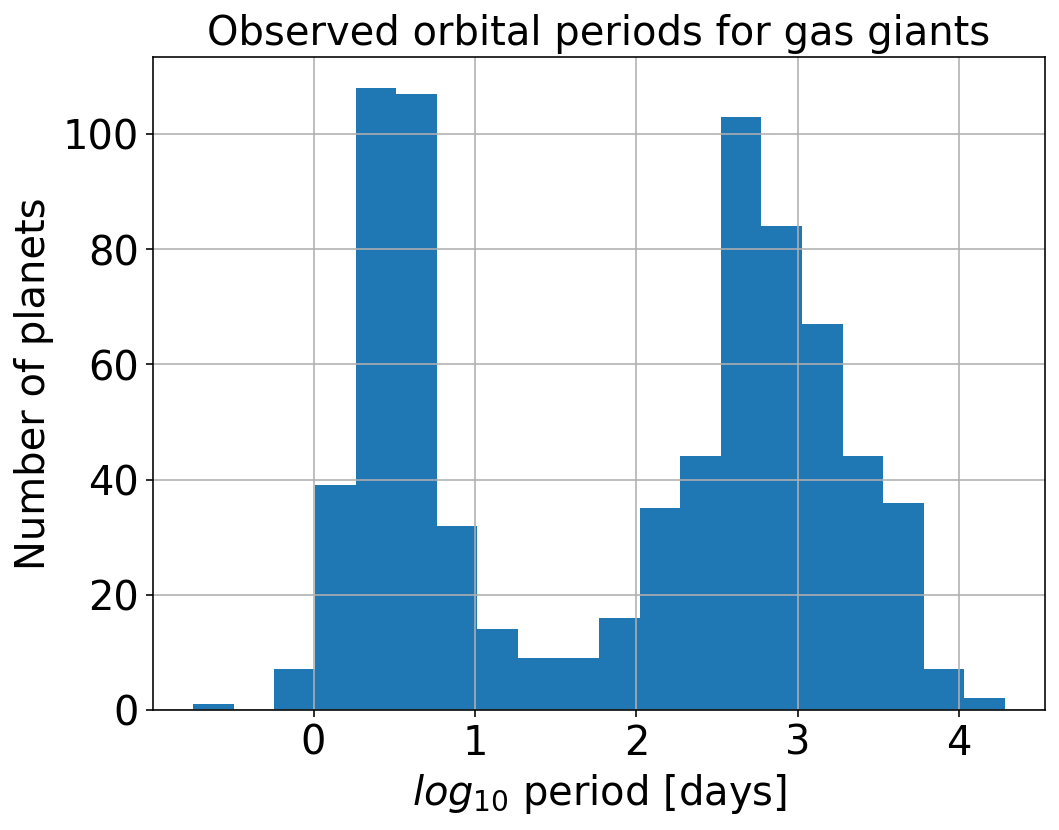

In [202]:
mask_gas_giants = planets_all['m'].values > .5

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.log10(planets_all['P'].values[mask_gas_giants]), bins=20);
ax.set_xlabel('$log_{10}$ period [days]')
ax.set_ylabel('Number of planets')
ax.set_title('Observed orbital periods for gas giants')
ax.grid()

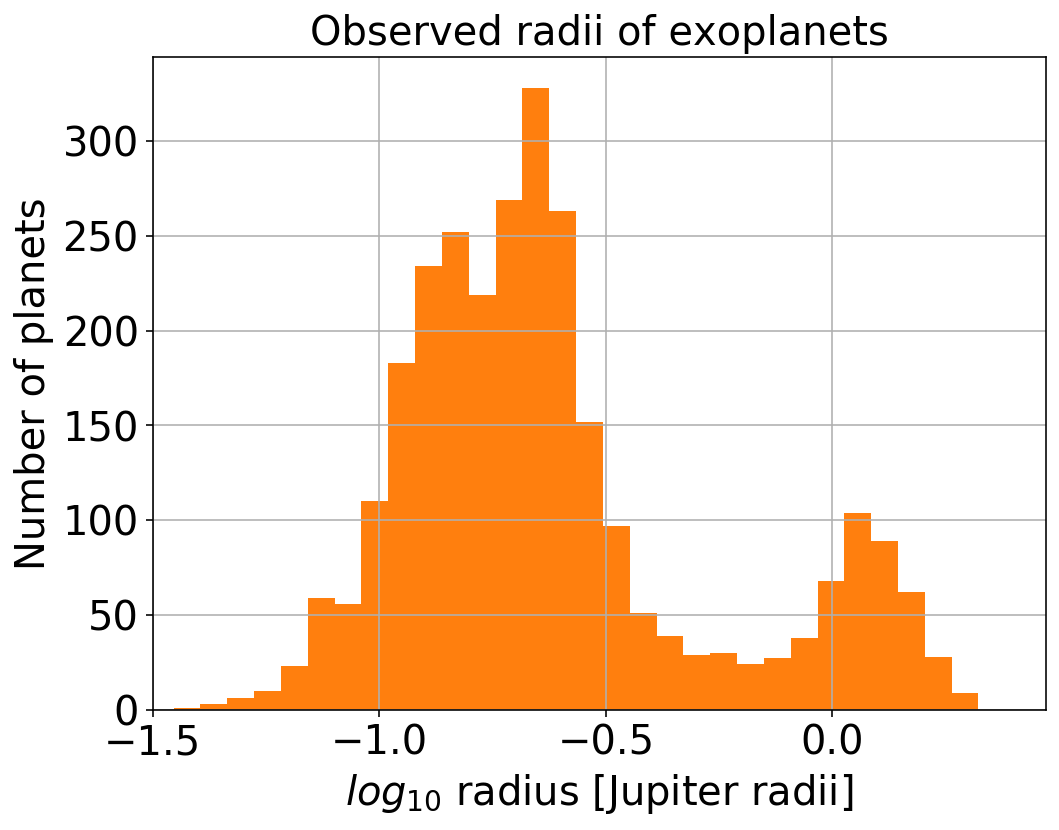

In [203]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.log10(planets_all['R'].values), bins=50, color='C1');
ax.set_xlabel('$log_{10}$ radius [Jupiter radii]')
ax.set_ylabel('Number of planets')
ax.set_title('Observed radii of exoplanets')
ax.set_xlim(left=-1.5)
ax.grid()